In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [26]:
dataset = pd.read_csv('../Data/mushrooms.csv')

dataset_features = dataset.drop('class', axis=1)
dataset_target = dataset['class']

In [27]:
train_features, test_features, train_target, test_target = train_test_split(dataset_features, dataset_target, test_size = 0.2, random_state= 1025)
print("shape before one hot encoding : ",train_features.shape, test_features.shape, train_target.shape, test_target.shape)

train_features = pd.get_dummies(train_features)
test_features = pd.get_dummies(test_features)
print("shape after one hot encoding : ", train_features.shape, test_features.shape, train_target.shape, test_target.shape)

shape before one hot encoding :  (6499, 22) (1625, 22) (6499,) (1625,)
shape after one hot encoding :  (6499, 117) (1625, 117) (6499,) (1625,)


In [28]:
model = RandomForestClassifier()
model.fit(train_features, train_target)

feat_importances = pd.Series(model.feature_importances_, index= train_features.columns)
feat_importances

cap-shape_b    0.001571
cap-shape_c    0.000083
cap-shape_f    0.001050
cap-shape_k    0.000613
cap-shape_s    0.000117
                 ...   
habitat_l      0.000702
habitat_m      0.005253
habitat_p      0.002171
habitat_u      0.006576
habitat_w      0.001064
Length: 117, dtype: float64

In [29]:
def modeling(model, train_features = train_features, test_features = test_features): # 모델링
    model.fit(train_features, train_target)
    prediction = model.predict(test_features)
    accuaracy = round(cross_val_score(model, train_features, train_target, cv=5).mean()*100,2)
    print("train set accuaracy : %f%%" %(accuaracy))
    return prediction, accuaracy

In [32]:
for i in range(1, 25):
    a = feat_importances.nlargest(i)
    new_train_features = train_features[a.index]
    new_test_features = test_features[a.index]

    rf_pred = modeling(RandomForestClassifier(), new_train_features, new_test_features )
    conf_mtrx = confusion_matrix(test_target, rf_pred[0], labels=['e','p'])
    
    if conf_mtrx[0,1] + conf_mtrx[1,0] == 0: # 모든 버섯을 정확하게 분류할 때 까지 feature 를 추가합니다.
        break
print("Total %d features selected" %(i))
print(a.index)

train set accuaracy : 88.680000%
train set accuaracy : 88.680000%
train set accuaracy : 96.920000%
train set accuaracy : 96.920000%
train set accuaracy : 96.920000%
train set accuaracy : 97.400000%
train set accuaracy : 97.400000%
train set accuaracy : 97.720000%
train set accuaracy : 97.720000%
train set accuaracy : 97.830000%
train set accuaracy : 97.940000%
train set accuaracy : 99.050000%
train set accuaracy : 99.050000%
train set accuaracy : 99.050000%
train set accuaracy : 99.150000%
train set accuaracy : 99.150000%
train set accuaracy : 99.150000%
train set accuaracy : 100.000000%
Total 18 features selected
Index(['odor_n', 'gill-size_b', 'odor_f', 'gill-size_n',
       'stalk-surface-below-ring_k', 'ring-type_p', 'gill-color_b',
       'stalk-surface-above-ring_s', 'spore-print-color_h', 'bruises_t',
       'stalk-surface-above-ring_k', 'gill-spacing_w', 'bruises_f',
       'spore-print-color_w', 'stalk-root_b', 'population_v', 'odor_p',
       'stalk-shape_e'],
      dtype='ob

Text(51.0, 0.5, 'True')

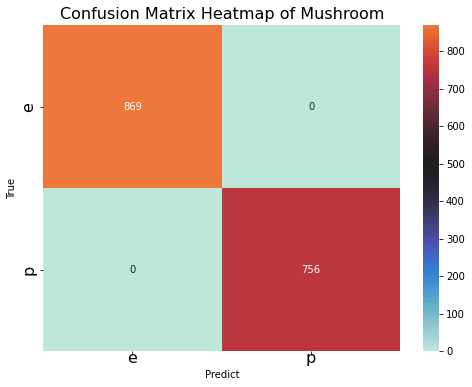

In [33]:
conf_mtrx = confusion_matrix(test_target, rf_pred[0], labels = ['e','p'])

plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Heatmap of Mushroom', fontsize = 16)

conf_heatmap = sns.heatmap(conf_mtrx, annot = True, fmt = "d", center = 500)

conf_heatmap.set_yticklabels(('e','p'), va = 'center', fontsize = '16')
conf_heatmap.set_xticklabels(('e','p'), va = 'center', fontsize = '16')
conf_heatmap.set_xlabel('Predict')
conf_heatmap.set_ylabel('True')